<a href="https://colab.research.google.com/github/mymess/Jupyter-Notebooks/blob/master/Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Having a good understanding of how things work can help us quickly home in on the
appropriate model, the right training algorithm to use, and a good set of hyperparameters for our task.

Understanding what’s under the hood will also help us debug issues and perform error analysis more
efficiently. Lastly, most of the topics discussed in this chapter will be essential in understanding, building,
and training neural networks.

In this section, we will start by looking at the Linear Regression model, one of the simplest models there
is. We will discuss two very different ways to train it:

*   Using a direct “closed-form” equation that directly computes the model parameters that best fit the model to the training set (i.e., the model parameters that minimize the cost function over the training
set).

*   Using an iterative optimization approach, called Gradient Descent (GD), that gradually tweaks the
model parameters to minimize the cost function over the training set, eventually converging to the
same set of parameters as the first method. We will look at a few variants of Gradient Descent that
we will use again and again when we study neural networks in Part II: Batch GD, Mini-batch GD,
and Stochastic GD.


Next we will look at Polynomial Regression, a more complex model that can fit nonlinear datasets. Since
this model has more parameters than Linear Regression, it is more prone to overfitting the training data,
so we will look at how to detect whether or not this is the case, using learning curves, and then we will
look at several regularization techniques that can reduce the risk of overfitting the training set.

Finally, we will look at two more models that are commonly used for classification tasks: Logistic
Regression and Softmax Regression.

#Setup

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


#1.   Linear Regression



A linear model makes a prediction by simply computing a weighted sum of the input
features, plus a constant called the *bias term* (also called the *intercept term*), as follows:


$$\huge
\hat y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n 
$$

where:


*   $\hat y $ is the predicted value
*   $n $ is the number of features or attributes
*   $x_i $ is the $i^{th}$ feature value
*   $\theta_j $ is the $i^{th}$ model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1, \theta_2, \cdots ,\theta_n$)



This equation can alse be written like this:

$$\huge
\hat y = h_\theta(x) = \theta^T \cdot x  
$$

where:


*  $\theta$  is the model's parameter vector (including the bias term $𝜃_0$ and the feature weights $𝜃_1$ to $𝜃_𝑛$)
 
*  $\theta^T$ is the transpose of $\theta$ (a row vector instead of a column vector)

*  $x$ is the instance’s *feature vector*, containing $x_0$ to $x_n$, with $x_0$ always equal to 1

*  $\theta^T · x$ is the dot product of $\theta^T$ and $x$

*  $h_0$ is the hypothesis function, using the model parameters $\theta$




So that’s the Linear Regression model, but how do we train it? Well, recall that training a model
means setting its parameters so that the model best fits the training set. For this purpose, we first need a
measure of how well (or poorly) the model fits the training data. The most
common performance measure of a regression model is the ***Root Mean Square Error*** (**RMSE**). Therefore, to train a Linear Regression model, you need to find the value of $\theta$ that minimizes the
RMSE. In practice, it is simpler to minimize the ***Mean Square Error*** (**MSE**) than the RMSE, and it leads
to the same result (because the value that minimizes a function also minimizes its square root).
The MSE of a Linear Regression hypothesis $h_\theta$ on a training set $X$ is calculated using the equation:

$$\huge MSE (X, h_\theta) = \frac{1}{m}\sum_{i=1}^m (\theta^T\cdot x^{(i)})^2 $$

###The Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a closed-form solution — i.e.,
a mathematical formula that gives the result directly. This is called **the Normal Equation**.

$$\huge
\hat \theta = (X^T X)^{-1}\cdot X^T \cdot y
$$

where 

*   $\hat \theta$ is the value of  $\theta$ that minimizes the cost function
*   $y$ is the  vector containing the target values from $y_1$ to $y_m$



Now, to put all this into practice, let's generate a random linear dataset and plot it:

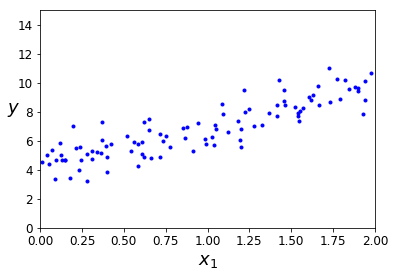

In [0]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
#save_fig("generated_data_plot")
plt.show()

Now let’s compute using the Normal Equation. We will use the `inv()` function from NumPy’s Linear
Algebra module (`np.linalg`) to compute the inverse of a matrix, and the `dot()` method for matrix multiplication:

In [0]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The actual function that we used to generate the data is $y = 4 + 3*x_0 + GaussianNoise$. Let’s see what the
equation found:

In [0]:
theta_best

array([[4.21509616],
       [2.77011339]])

We would have hoped for  \$θ_0 = 4$  and
$θ_1 = 3$ instead of $a_0 =  4.215$ and
$θ_1 = 2.770$.

Close enough, but the noise made it impossible to recover the exact parameters of the original function.


In [0]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 column to each instance
y_predict = X_new_b.dot(theta_best) #calculates the y-values of two points defining a straight line 
y_predict  

array([[4.21509616],
       [9.75532293]])

Now, let's do the same thing the Scikit-Learn way:

In [0]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("y = {0} + {1}*x".format(np.float(lin_reg.intercept_), np.float(lin_reg.coef_)))

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)


y = 4.215096157546746 + 2.770113386438484*x


We can now plot the result:

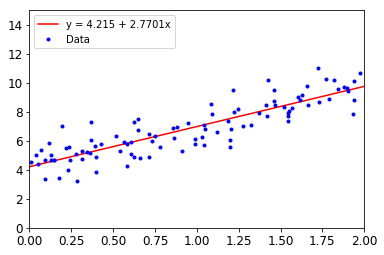

In [0]:
#the 2 points are (0, 4.215) and (2, 9.755)
plt.plot(X_new, y_predict, "r-", label="y = 4.215 + 2.7701x")
plt.plot(X, y, "b.", label="Data")
plt.legend(loc="upper left")
plt.axis([0, 2, 0, 15])
plt.show()

#2. Polynomial Regression


What if our data is actually more complex than a simple straight line? Surprisingly, we can actually use
a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new
features, then train a linear model on this extended set of features. This technique is called ***Polynomial Regression***.
Let’s look at an example. First, let’s generate some nonlinear data, based on a simple quadratic equation plus some noise:

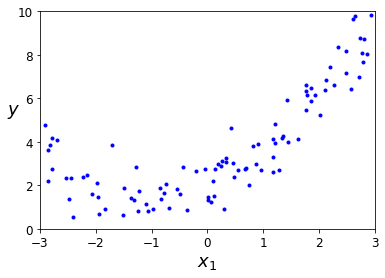

In [0]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("generated_data_plot")
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s **`PolynomialFeatures`**
class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the
training set as new features (in this case there is just one feature):

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.76886782])

`X_poly` now contains the original feature of X plus the square of this feature. Now you can fit a `LinearRegression` model to this extended training data:

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99958228]), array([[1.04630034, 0.5015459 ]]))

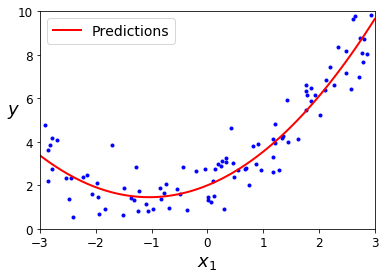

In [0]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_predictions_plot")
plt.show()

Not bad: the model estimates $y = 1.9996 + 1.0463 x + 0.5015x^2 $ when in fact the original function was $y = 2 + x + 0.5 x^2$

Note that when there are multiple features, Polynomial Regression is capable of finding relationships
between features (which is something a plain Linear Regression model cannot do). This is made possible
by the fact that PolynomialFeatures also adds all combinations of features up to the given degree. For
example, if there were two features a and b, `PolynomialFeatures` with degree=3 would not only add the features $a^2, a^3, b^2, \ and \ b^3$, but also the combinations $ab, a^2b \ and \ ab^2$.

#Learning curves

How can we decide how complex our model should be? How can we tell
that your model is overfitting or underfitting the data?
In the Multivariate regression section we used cross-validation to get an estimate of a model’s generalization performance. 

**If a
model performs well on the training data but generalizes poorly according to the cross-validation metrics, then our model is overfitting. If it performs poorly on both, then it is underfitting.** 

This is one way to tell
when a model is too simple or too complex.


Another way is to look at the **learning curves**: these are plots of the model’s performance on the training
set and the validation set as a function of the training set size. To generate the plots, simply train the model
several times on different sized subsets of the training set. 

The following code defines a function that plots
the learning curves of a model given some training data:

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict, y_val))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
  plt.axis([0, 80, 0, 3])                         # not shown in the book
  #save_fig("underfitting_learning_curves_plot")   # not shown
  plt.legend(loc="upper right", fontsize=14)   # not shown in the book
  plt.xlabel("Training set size", fontsize=14) # not shown
  plt.ylabel("RMSE", fontsize=14)              # not shown
  plt.show()                                      # not shown


##Underfitting the model

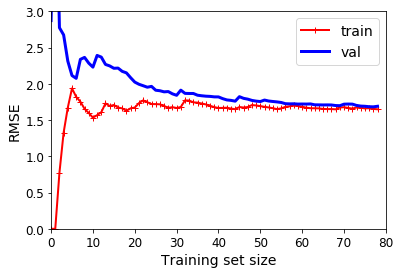

In [0]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)


This deserves a bit of explanation. First, let’s look at the performance on the training data: when there are
just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts
at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the
training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the
training data goes up until it reaches a plateau, at which point adding new instances to the training set
doesn’t make the average error much better or worse. Now let’s look at the performance of the model on
the validation data. When the model is trained on very few training instances, it is incapable of
generalizing properly, which is why the validation error is initially quite big. Then as the model is shown
more training examples, it learns and thus the validation error slowly goes down. 

However, once again a
straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the
other curve.


These learning curves are typical of an underfitting model. **Both curves have reached a plateau; they are
close and fairly high.**

##Best fitting the model

Now let’s look at the learning curves of a 2nd-degree polynomial model on the same data, i.e. the model that best fits the data:

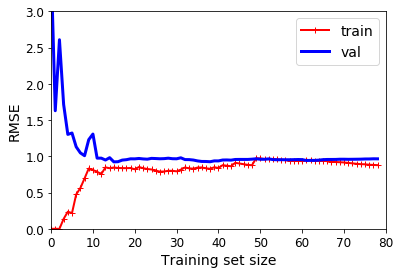

In [0]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
("lin_reg", LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)

This is how the chart for the best model should look like. Both curves converge quite quickly and both tend to the minimum RMSE, which is around 1.



##Overfitting the model

Now let’s look at the learning curves of a 10th-degree polynomial model (an overfitting model) on the same data:

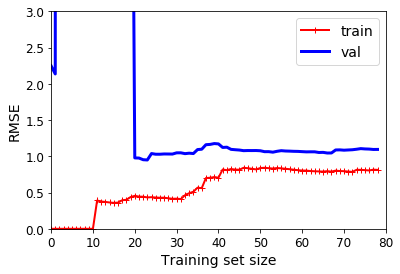

In [0]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)

These learning curves look a bit like the previous ones, but there are two very important differences:


*   The error on the training data is much lower than with the Linear Regression model (one degree polynomial).
*   **There is a gap between the curves**. This means that **the model performs significantly better on the
training data than on the validation data, which is the hallmark of an overfitting model**. However, if
you used a much larger training set, the two curves would continue to get closer.

#Logistic Regression

As we discussed earlier, some regression algorithms can be used for classification as well (and
vice versa). **Logistic Regression** (also called Logit Regression) is commonly used to estimate the
probability that an instance belongs to a particular class (e.g., what is the probability that this email is
spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs
to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to
the negative class, labeled “0”). This makes it a binary classifier.

##Estimating probabilities

So how does it work? Just like a Linear Regression model, a Logistic Regression model computes a
weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the
Linear Regression model does, it outputs the logistic of this result.

The logistic — also called the logit, noted σ(·) — is a sigmoid function (i.e., S-shaped) that outputs a
number between 0 and 1. It is defined as follows:

$$\huge
\hat p = h_0(x)=\sigma(\theta^T \cdot x)
$$\
where 

$$\huge \sigma(t) = \frac{1}{1 + e^{-t}}$$


We can plot the sigma function as follows:

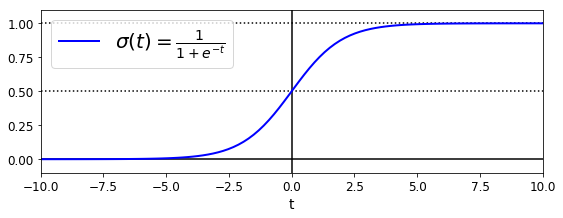

In [0]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
#save_fig("logistic_function_plot")
plt.show()

Once the Logistic Regression model has estimated the probability = $h_θ(x)$ that an instance $x$ belongs to
the positive class, it can make its prediction $\hat y$ easily:


$$\large
\hat y = \begin{cases} 0, & \mbox{if } \hat p <0,5 \\ 
1, & \mbox{if } \hat p \geq 0.5  \end{cases}
$$


Notice that $σ(t) < 0.5$ when $t < 0$, and $σ(t) ≥ 0.5$ when $t ≥ 0$, so a Logistic Regression model predicts 1 if
$\theta^T · x $ is positive, and 0 if it is negative.

##Decision Boundaries


Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal
and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and
Iris-Virginica:

![](https://drive.google.com/uc?id=1IBJPIn0rvqpa2VEYW9pifBQt7VOx-QqR)




Let’s try to build a classifier to detect the Iris-Virginica type based only on the **petal width** feature. First
let’s load the data:

In [0]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [0]:
X = iris["data"][:, 3:] # petal width
print("X = ", X[:5])
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0
print("\ny = ", y[:5])

X =  [[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]]

y =  [0 0 0 0 0]


Now let’s train a Logistic Regression model:

In [0]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm:

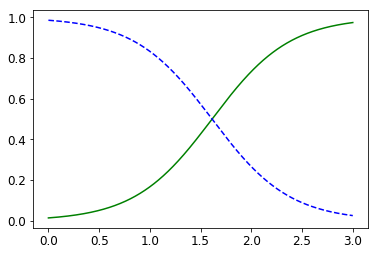

In [0]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
# + more Matplotlib code to make the image look pretty

Let's add a bit more explanatory details to the chart and thus learn some of Matplotlib's capabilities in the process:

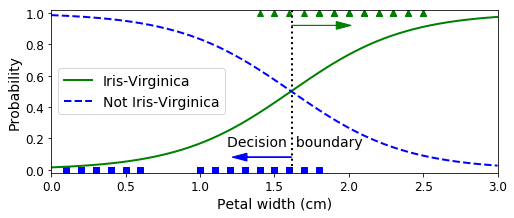

In [0]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
#save_fig("logistic_regression_plot")
plt.show()

The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while
the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm
to 1.8 cm. Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the
flower is an Iris-Virginica (it outputs a high probability to that class), while below 1 cm it is highly
confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica” class). In between
these extremes, the classifier is unsure. 

However, if you ask it to predict the class (using the `predict()`
method rather than the `predict_proba()` method), it will return whichever class is the most likely.
Therefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if
the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-Virginica, or else
it will predict that it is not (even if it is not very confident):

In [0]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Let's now add another attribute, the **petal length** and plot both petal width and petal length:

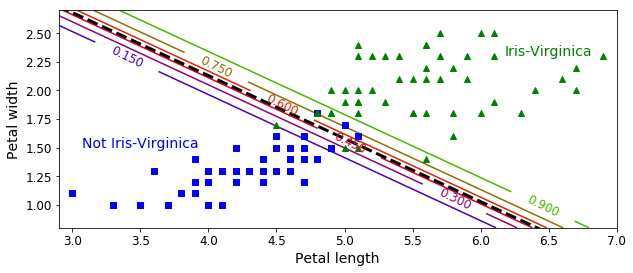

In [0]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

#plot green triangles and blue squares
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

Just like the other linear models, Logistic Regression models can be regularized using ℓ1 or ℓ2 penalties.
Scitkit-Learn actually adds an ℓ2 penalty by default.


#Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to
train and combine multiple binary classifiers. This is called *Softmax
Regression*, or *Multinomial Logistic Regression*.
The idea is quite simple: when given an instance $x$, the Softmax Regression model first computes a score
$s_k(x)$ for each class $k$, then estimates the probability of each class by applying the **softmax function** (also
called the **normalized exponential**) to the scores. The equation to compute $s_k(x)$ should look familiar, as
it is just like the equation for Linear Regression prediction:

$$ \huge
s_k(x) = (\theta^{(k)})^T \cdot x
$$


Note that each class has its own dedicated parameter vector $θ^{(k)}$. All these vectors are typically stored as
rows in a parameter matrix $Θ$.


Once you have computed the score of every class for the instance $x$, you can estimate the probability $k$
that the instance belongs to class $k$ by running the scores through the softmax function: it
computes the exponential of every score, then normalizes them (dividing by the sum of all the
exponentials):

$$
\huge
\hat p_k= \sigma(s(x))_k =\frac{exp(s_k(x))}{\sum_{j=1}^k exp(s_j(x))} $$

where:



*   $K$ is the number of classes
*   $s(x)$ is a vector containing the scores of each class for the instance $x$.
*   $\sigma(s(x))_k$ is the estimated probability that the instance $x$ belongs to class $k$ given the scores of each class for that instance.







Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the
highest estimated probability (which is simply the class with the highest score), as follows:
$$\large \hat y=\mbox{argmax}_k\sigma(s(x))_k=\mbox{argmax}_k \sigma(s_k(x)) = \mbox{argmax}_k ((\theta^{(k)})^T \cdot x)$$

The *argmax* operator returns the value of a variable that maximizes a function. In this equation, it
returns the value of $k$ that maximizes the estimated probability $σ(s(x))_k$.

---
**<center>NOTE</center>**
The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput) so it should be used only
with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture.

---

Let’s use Softmax Regression to classify the iris flowers into all three classes. Scikit-Learn’s
LogisticRegression uses one-versus-all by default when you train it on more than two classes, but you
can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression instead.
You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver (see Scikit-
Learn’s documentation for more details). It also applies ℓ2 regularization by default, which you can
control using the hyperparameter C.

In [23]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Let's make our the Softmax regressor tell us what type of Iris flower has a 5 cm long petal and a 2 cm petal width:

In [41]:
print("Flower with 5 cm petal length, and 2 cm petal with is: ", iris["target_names"][softmax_reg.predict([[5, 2]]) ] )

print("Probabilities for these dimensions for each type of flower \n{0} are\n {1}".format(
    iris["target_names"], softmax_reg.predict_proba([[5, 2]]))) 

Flower with 5 cm petal length, and 2 cm petal with is:  ['virginica']
Probabilities for these dimensions for each type of flower 
['setosa' 'versicolor' 'virginica'] are
 [[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


So the next time you find an iris with 5 cm long and 2 cm wide petals, you can ask your model to tell you
what type of iris it is, and it will answer Iris-Virginica (class 2) with 94.2% probability (or Iris-
Versicolor with 5.7% probability):

Let's now plot the resulting decision boundaries, represented by the background colors. 

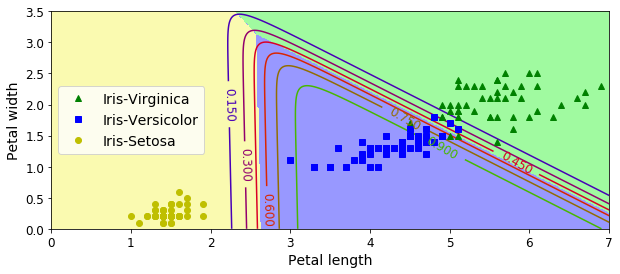

In [42]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()


Notice that
the decision boundaries between any two classes are linear. The figure also shows the probabilities for
the Iris-Versicolor class, represented by the curved lines (e.g., the line labeled with 0.450 represents the
45% probability boundary). Notice that the model can predict a class that has an estimated probability
below 50%. For example, at the point where all decision boundaries meet, all classes have an equal
estimated probability of 33%.